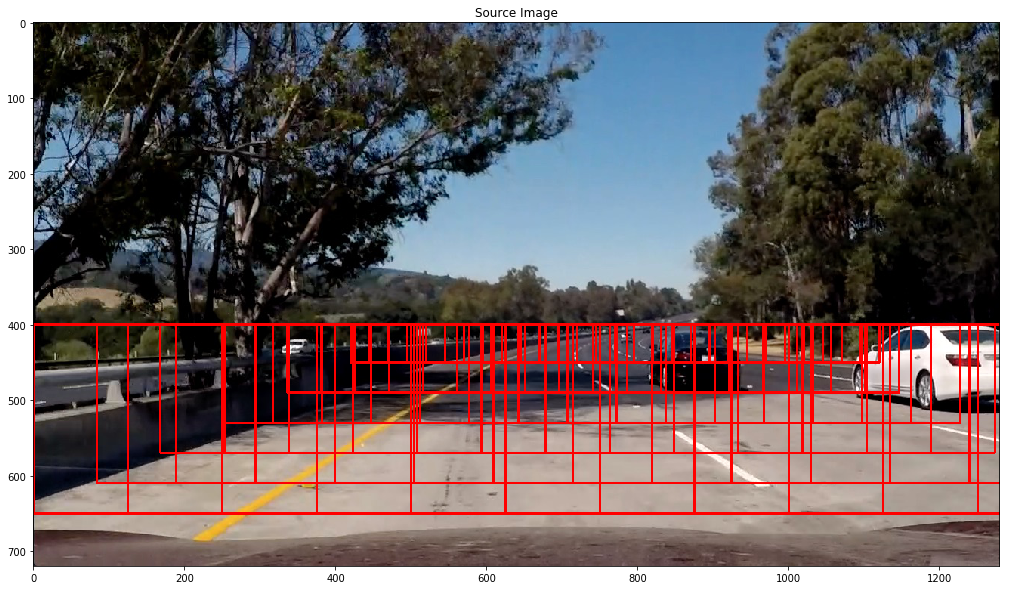

In [152]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image = mpimg.imread('test_images/test5.jpg')

# convert to gray scale of each frame
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def window():
    start = np.array([[420], [400], [1100], [450]])
    end  = np.array([[0], [400], [1280], [650]])
    dif = end - start
    percent = dif * np.arange(0.2, 1, 0.2)
    windows = np.concatenate((end, np.zeros_like(percent) + end - percent, start), axis=1).astype(int).transpose()
    window_list = []
    for window in windows:
        x1 = window[0]
        x2 = window[2]
        sq_dim = window[3] - window[1]
        num_windows = int((x2-x1)/sq_dim*2)
        increment = (np.arange(num_windows) * sq_dim/2).astype(int)
        result = np.ones((num_windows,1)) * np.array([x1,window[1],x1+sq_dim,window[3]]).astype(int)
        result[:,0] += increment
        result[:,2] += increment
        if not window_list:
            window_list.append(result.astype(int))
            continue
        window_list[0] = np.concatenate((window_list[0], result.astype(int)),axis=0)
    return np.array(window_list)[0]

for x,y,w,h in window():
    cropped = cv2.resize(gray[y:h, x:w],(64,64))
    if True:
        cv2.rectangle(image,(x,y),(w,h),(255,0,0),2)

f, ax1 = plt.subplots(1,1,figsize=(20,10))
ax1.set_title('Source Image')
ax1.imshow(image)

plt.show()

In [118]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list